In [1]:
import os, sys
import datetime
from datetime import datetime, date, timedelta
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas_profiling import ProfileReport
import mglearn
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d import Axes3D, axes3d
from scipy import sparse
import scipy.stats as ss
import scipy.cluster.hierarchy as sch
import pingouin as pg
import spacy, nltk
from konlpy.tag import Okt

c:\Users\admin\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [7]:
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold, GroupKFold, StratifiedGroupKFold, LeaveOneOut, ShuffleSplit, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, SVR

In [5]:
X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
iris = load_iris(as_frame=True)

In [10]:
logreg = LogisticRegression(max_iter=1000)
scores = cross_val_score(logreg, iris['data'], iris['target'], cv=5)
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [12]:
scores = cross_validate(logreg, iris['data'], iris['target'], cv=5, return_train_score=True)
scores

{'fit_time': array([0.02602386, 0.02802491, 0.02402234, 0.01901627, 0.02001739]),
 'score_time': array([0.00100088, 0.00100088, 0.00200176, 0.00100136, 0.00100112]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [13]:
scores_df = pd.DataFrame(scores)
scores_df

,fit_time,score_time,test_score,train_score
0,0.026024,0.001001,0.966667,0.966667
1,0.028025,0.001001,1.000000,0.966667
2,0.024022,0.002002,0.933333,0.983333
3,0.019016,0.001001,0.966667,0.983333
4,0.020017,0.001001,1.000000,0.975000


In [19]:
shuffle_split = ShuffleSplit(train_size=0.5, test_size=0.3, n_splits=10)
scores = cross_val_score(logreg, iris['data'], iris['target'], cv=shuffle_split)
scores

array([0.97777778, 0.95555556, 0.95555556, 0.97777778, 0.97777778,
       0.97777778, 0.91111111, 0.97777778, 0.95555556, 0.95555556])

In [20]:
X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]

In [22]:
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
scores

array([0.75      , 0.6       , 0.66666667])

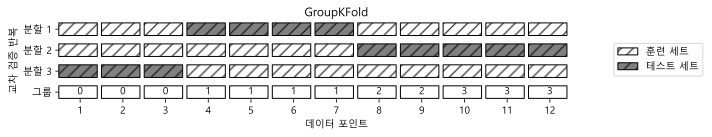

In [23]:
mglearn.plots.plot_group_kfold()

In [29]:
iris = load_iris(as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=0)

In [30]:
param_grid = {'C':np.logspace(-3, 2, 6), 'gamma':np.logspace(-3, 2, 6)}

In [33]:
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             return_train_score=True)

In [35]:
# score() 메서드는 테스트 세트로 계산하는 일반화 성능, best_score_ 속성은 최상의 교차검증 평균 정확도
grid.score(X_test, y_test), grid.best_params_, grid.best_estimator_, grid.best_score_

(0.9736842105263158,
 {'C': 10.0, 'gamma': 0.1},
 SVC(C=10.0, gamma=0.1),
 0.9731225296442687)

In [38]:
# 평균점수가 같은 파라미터의 조합이 있을 경우 표준편차가 작은 파라미터 조합이 더 좋다고 판단
results = pd.DataFrame(grid.cv_results_)
results.T

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
mean_fit_time,0.002002,0.002803,0.002002,0.002202,0.002202,0.002202,0.002002,0.002002,0.002002,0.002202,...,0.001402,0.001801,0.003803,0.002402,0.001401,0.002002,0.002602,0.001401,0.002402,0.002202
std_fit_time,0.0,0.0004,0.000001,0.000401,0.0004,0.0004,0.0,0.0,0.000633,0.0004,...,0.00049,0.000749,0.001601,0.00049,0.00049,0.0,0.001201,0.00049,0.00049,0.0004
mean_score_time,0.001802,0.001401,0.001001,0.001001,0.001601,0.001601,0.001602,0.001601,0.001201,0.001602,...,0.002202,0.001201,0.001201,0.001401,0.001401,0.002803,0.001001,0.001201,0.001001,0.001802
std_score_time,0.0004,0.00049,0.000633,0.0,0.00049,0.00049,0.00049,0.00049,0.0004,0.001201,...,0.001941,0.0004,0.0004,0.00049,0.00049,0.003603,0.0,0.0004,0.0,0.0004
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,10.0,10.0,10.0,10.0,100.0,100.0,100.0,100.0,100.0,100.0
param_gamma,0.001,0.01,0.1,1.0,10.0,100.0,0.001,0.01,0.1,1.0,...,0.1,1.0,10.0,100.0,0.001,0.01,0.1,1.0,10.0,100.0
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1.0}","{'C': 0.001, 'gamma': 10.0}","{'C': 0.001, 'gamma': 100.0}","{'C': 0.01, 'gamma': 0.001}","{'C': 0.01, 'gamma': 0.01}","{'C': 0.01, 'gamma': 0.1}","{'C': 0.01, 'gamma': 1.0}",...,"{'C': 10.0, 'gamma': 0.1}","{'C': 10.0, 'gamma': 1.0}","{'C': 10.0, 'gamma': 10.0}","{'C': 10.0, 'gamma': 100.0}","{'C': 100.0, 'gamma': 0.001}","{'C': 100.0, 'gamma': 0.01}","{'C': 100.0, 'gamma': 0.1}","{'C': 100.0, 'gamma': 1.0}","{'C': 100.0, 'gamma': 10.0}","{'C': 100.0, 'gamma': 100.0}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1.0,0.956522,0.869565,0.521739,1.0,1.0,1.0,0.956522,0.869565,0.521739
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.956522,0.913043,0.956522,0.956522,0.913043,0.521739
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,...,1.0,1.0,1.0,0.590909,1.0,1.0,1.0,1.0,1.0,0.590909


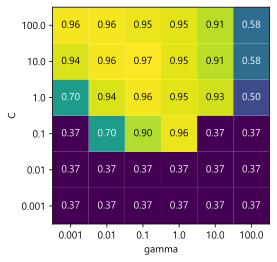

In [46]:
scores = results.loc[:, 'mean_test_score'].values.astype('float64').reshape(6, 6)
mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'], yticklabels=param_grid['C'])

In [49]:
# SVC에서 kernel 파라미터는 리스트 안에 들어가야
param_grid = [{'kernel':['rbf'], 'C':np.logspace(-3, 2, 6), 'gamma':np.logspace(-3, 2, 6)},
{'kernel':['linear'], 'C':np.logspace(-3, 2, 6)}]

In [50]:
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'kernel': ['rbf']},
                         {'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'kernel': ['linear']}],
             return_train_score=True)

In [51]:
grid.score(X_test, y_test), grid.best_params_, grid.best_estimator_, grid.best_score_

(0.9736842105263158,
 {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'},
 SVC(C=10.0, gamma=0.1),
 0.9731225296442687)

In [52]:
results = pd.DataFrame(grid.cv_results_)
results.T

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.002001,0.002002,0.002002,0.002602,0.002202,0.003003,0.002202,0.002002,0.002803,0.003003,...,0.001602,0.001601,0.002202,0.002402,0.001601,0.001602,0.001602,0.001602,0.001601,0.001601
std_fit_time,0.000003,0.0,0.0,0.000491,0.0004,0.000633,0.0004,0.0,0.0004,0.000633,...,0.00049,0.00049,0.0004,0.00049,0.000801,0.00049,0.00049,0.00049,0.00049,0.00049
mean_score_time,0.001401,0.001401,0.001602,0.001402,0.002202,0.001601,0.001601,0.001401,0.001802,0.002002,...,0.000801,0.001401,0.001001,0.001401,0.001601,0.001001,0.001001,0.001001,0.001001,0.001401
std_score_time,0.00049,0.00049,0.00049,0.000491,0.00098,0.00049,0.00049,0.00049,0.000401,0.000633,...,0.0004,0.00049,0.0,0.00049,0.00049,0.0,0.0,0.000001,0.0,0.000491
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100.0,100.0,100.0,100.0,0.001,0.01,0.1,1.0,10.0,100.0
param_gamma,0.001,0.01,0.1,1.0,10.0,100.0,0.001,0.01,0.1,1.0,...,0.1,1.0,10.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1.0, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10.0, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100.0, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1.0, 'kernel': 'rbf'}",...,"{'C': 100.0, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100.0, 'gamma': 1.0, 'kernel': 'rbf'}","{'C': 100.0, 'gamma': 10.0, 'kernel': 'rbf'}","{'C': 100.0, 'gamma': 100.0, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1.0, 'kernel': 'linear'}","{'C': 10.0, 'kernel': 'linear'}","{'C': 100.0, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1.0,0.956522,0.869565,0.521739,0.347826,0.869565,1.0,1.0,1.0,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1.0,0.956522


In [54]:
param_dist = [{'kernel':['rbf'], 'C':ss.loguniform(0.001, 100), 'gamma':ss.loguniform(0.001, 100)},
{'kernel':['linear'], 'C':ss.loguniform(0.001, 100)}]

In [55]:
rand = RandomizedSearchCV(SVC(), param_distributions=param_dist, cv=5, n_iter=20, return_train_score=True, n_jobs=-1)
rand.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20, n_jobs=-1,
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002194CB4A940>,
                                         'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002194D085B20>,
                                         'kernel': ['rbf']},
                                        {'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002194D0B0400>,
                                         'kernel': ['linear']}],
                   return_train_score=True)

In [56]:
rand.score(X_test, y_test), rand.best_params_, rand.best_estimator_, rand.best_score_

(0.9736842105263158,
 {'C': 1.5878961985014926, 'kernel': 'linear'},
 SVC(C=1.5878961985014926, kernel='linear'),
 0.9818181818181818)